# **Student Performance Regression**

# **Import Libraries**

In [39]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# **Loading Dataset**

In [40]:
df = pd.read_csv (r"C:\Users\bbuser\Desktop\News_Category\Student_Performance.csv")
df

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0
...,...,...,...,...,...,...
9995,1,49,Yes,4,2,23.0
9996,7,64,Yes,8,5,58.0
9997,6,83,Yes,8,5,74.0
9998,9,97,Yes,7,0,95.0


# **Exploring the dataset**

In [41]:
# Find number of rows and columns
df.shape

(10000, 6)

In [42]:
# Getting information about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


In [43]:
# showing first 5 rows
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [37]:
# Checking for duplicates
df.duplicated().sum()

np.int64(127)

# **Summarize numerical features**

In [4]:
df.describe()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,6.530600,4.583300,55.224800
std,2.589309,17.343152,1.695863,2.867348,19.212558
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


In [5]:
df.columns

Index(['Hours Studied', 'Previous Scores', 'Extracurricular Activities',
       'Sleep Hours', 'Sample Question Papers Practiced', 'Performance Index'],
      dtype='object')

# **Visualizations**

## **Histogram**

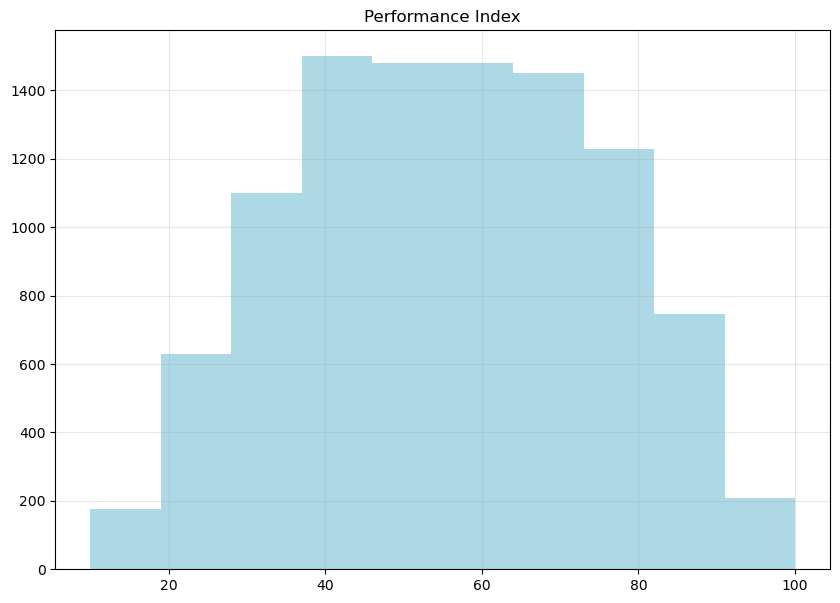

In [44]:
# Histogram for (Performance Index) column.
plt.figure(figsize=(10,7))
df['Performance Index'].hist(color = 'lightblue')
plt.title("Performance Index")
plt.grid(alpha= 0.3)
plt.show()

## **Boxplot**

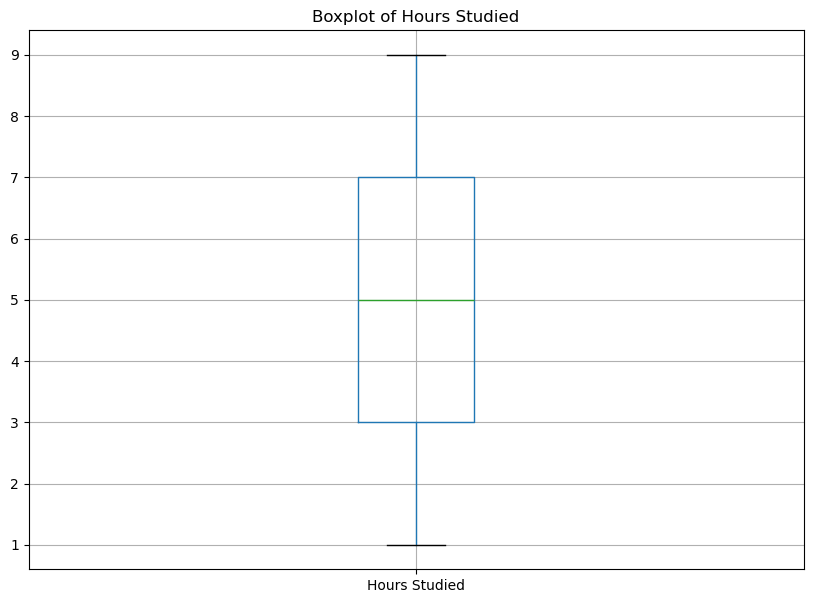

In [7]:
plt.figure(figsize=(10,7))
df.boxplot(column='Hours Studied')
plt.title("Boxplot of Hours Studied")
plt.show()

## **Scatterplots**

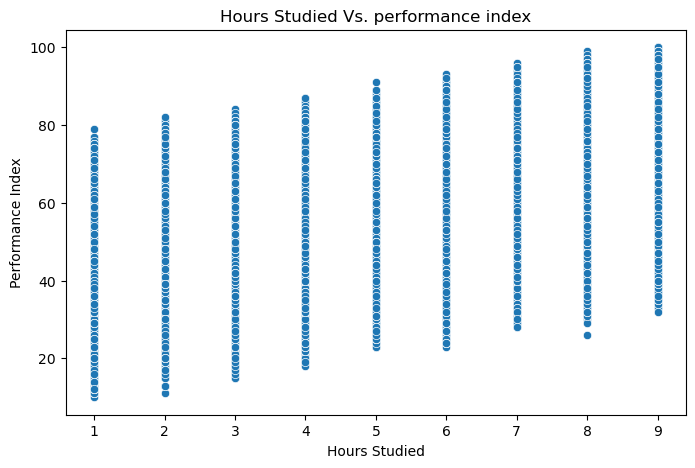

In [18]:
# Scatter plot for hours studied Vs. performance index
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x='Hours Studied', y='Performance Index')
plt.title('Hours Studied Vs. performance index')
plt.xlabel('Hours Studied')
plt.ylabel('Performance Index')
plt.show()

## **Heatmap**

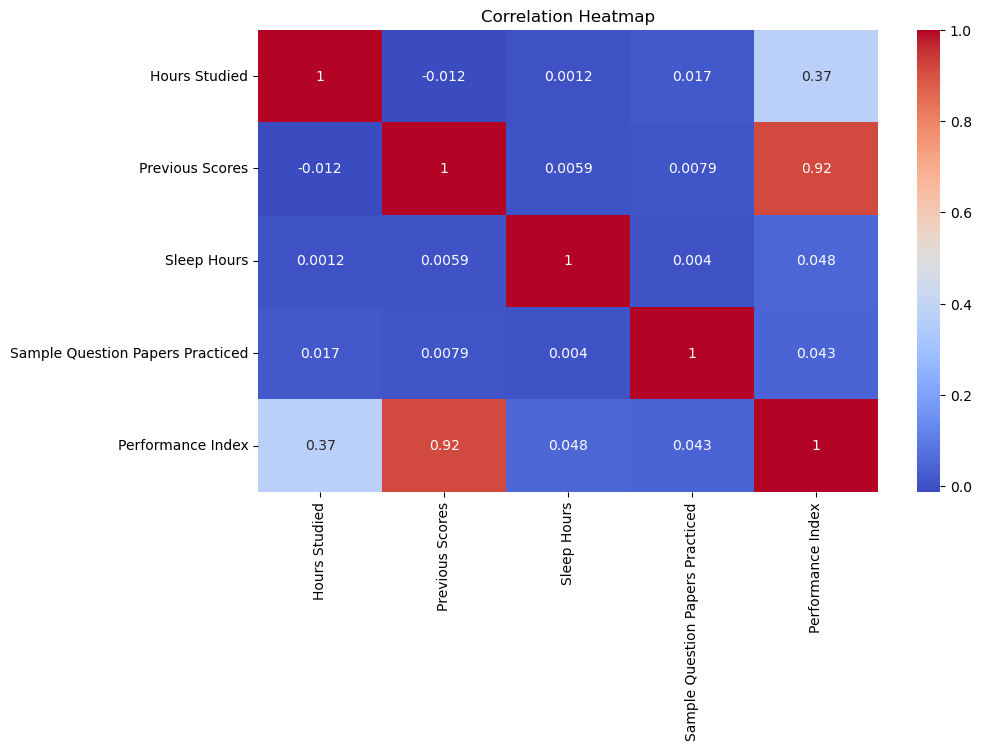

In [9]:
plt.figure(figsize=(10,6))
numeric_df = df.select_dtypes(include=['float64', 'int64'])
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# **Pairplot**

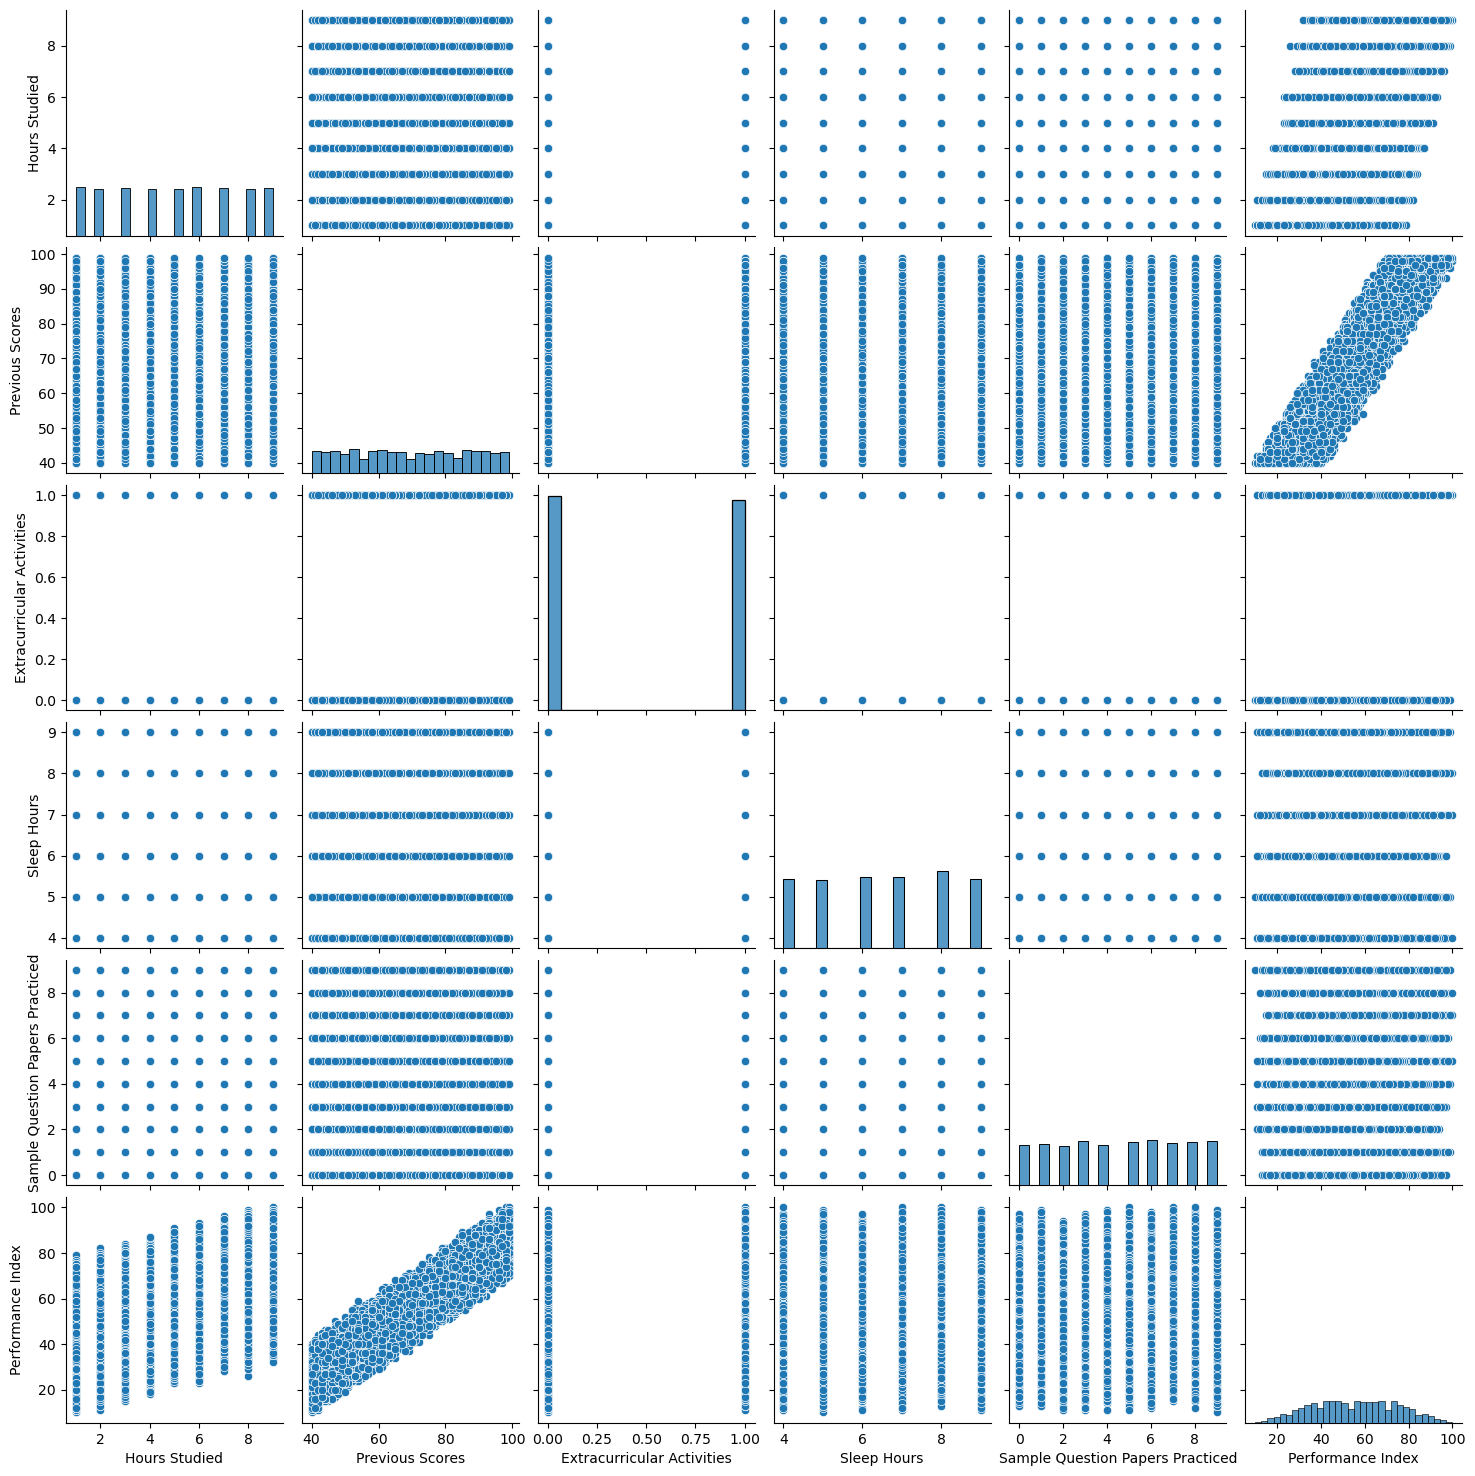

In [22]:
sns.pairplot(df)
plt.show()

# **Data Preprocessing**

In [48]:
# Convert categorical variables
df["Extracurricular Activities"] = df["Extracurricular Activities"].map({"Yes": 1, "No": 0})

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  int64  
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 468.9 KB


In [50]:
df.columns

Index(['Hours Studied', 'Previous Scores', 'Extracurricular Activities',
       'Sleep Hours', 'Sample Question Papers Practiced', 'Performance Index'],
      dtype='object')

# **Separate features and target**

In [51]:
x = df.drop ('Performance Index', axis=1) # This is feature 
y = df['Performance Index'] # This is target

# **Train-test split**

In [52]:
# split data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# **Build Regression Model**

In [53]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

# **Evaluate the Model**

In [54]:
# Make predictions and evaluate
y_pred = model.predict(x_test)

In [55]:
print (f"Cofficient: {model.coef_}") # (_)--> this shows that it is a private variable.

Cofficient: [2.85248393 1.0169882  0.60861668 0.47694148 0.19183144]


In [56]:
print (f"intercept: {model.intercept_}")

intercept: -33.92194621555628


In [64]:
rmse = np.sqrt(mse)
print("Root Mean Squared Error:", rmse)

Root Mean Squared Error: 2.0205515085050068


In [63]:
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 4.082628398521858


In [66]:
r2 = r2_score(y_test, y_pred)
print ("R-squared:", r2)

R-squared: 0.9889832909573145
